In [396]:
import matplotlib.pyplot as plt
import pandas as pd

In [397]:
file = open('eff.vcf', 'r')
depth = []
for line in file:
    #skip header
    if line[0] is '#':
        continue
    else:
        #split on ':' to extract format fields
        form = line.rstrip().split(':')
        DP = form[10]
        if DP == '.':
        #skip empty values
            continue
        else:
        #convert string to float
            DP=float(DP)
            depth.append(DP)
file.close()   
#print(depth)


In [398]:
file = open('eff.vcf', 'r')
qual = []
for line in file:
    if line[0] is '#':
        continue
    else:
        form2 = line.rstrip().split(':')
        GQ = form2[9]
        if GQ == '.':
            continue
        else:
            GQ = float(GQ)
            qual.append(GQ)
#print(qual)
file.close()

In [399]:
file = open('eff.vcf', 'r')
af = []
for line in file:
    if line[0] is '#':
        continue
    else:
    #split on ';' to extract info fields
        info = line.rstrip().split(';')
        #extract AF=val, then just val
        AF = (info[3][3:])
        af.append(AF)
#print(len(af))
af2 = []
for item in af:
    if ',' in item:
    #split on ',' for items with multiple values
        sep = item.split(',')
        #extract each value separately and append to a list
        val1 = float(sep[0])
        val2 = float(sep[1])
        af2.append(val1)
        af2.append(val2)           
    else:
        val3 = float(item)
        af2.append(val3)
#print(af2)             
file.close()

In [400]:
file = open('eff.vcf', 'r')
ann = []
for line in file:
    if line[0] is '#':
        continue
    else:
        info = line.rstrip().split(';')
        #extract ann field and remove ANN=N
        eff = info[41][6:]
        ann.append(eff)
pred_eff = []        
for line in ann:
    #split ann fields on '|'
    effects = line.split('|')
    first = effects[0]
    pred_eff.append(first) 
#print(pred_eff)    
final_pe = []
for item in pred_eff:
    #remove nucleotides and empty spaces in pred_eff
    if '_' in item:
        final_pe.append(item)
#print(final_pe)        

In [401]:
df_depth = pd.DataFrame(depth)
df_depth
#dfc = df_depth.value_counts()
#dfc

,0
0,25.0
1,25.0
2,17.0
3,7.0
4,13.0
...,...
40799,23.0
40800,18.0
40801,48.0
40802,10.0


In [402]:
df_qual = pd.DataFrame(qual)
df_qual
#dfq = df_qual.value_counts()
#dfq

,0
0,1.433390e+02
1,1.433390e+02
2,5.329550e+00
3,2.061210e+01
4,1.229870e-09
...,...
40799,4.380400e+00
40800,1.041560e+02
40801,1.286240e+02
40802,6.044640e-13


In [403]:
df_af = pd.DataFrame(af2)
df_af
#afc = df_af.value_counts()
#afc

,0
0,0.300000
1,0.300000
2,0.800000
3,0.700000
4,0.000000
...,...
42636,0.300000
42637,0.300000
42638,0.100000
42639,0.777778


In [404]:
eff = {}
for i in final_pe:
    eff[i] = eff.get(i, 0) +1
#eff    

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


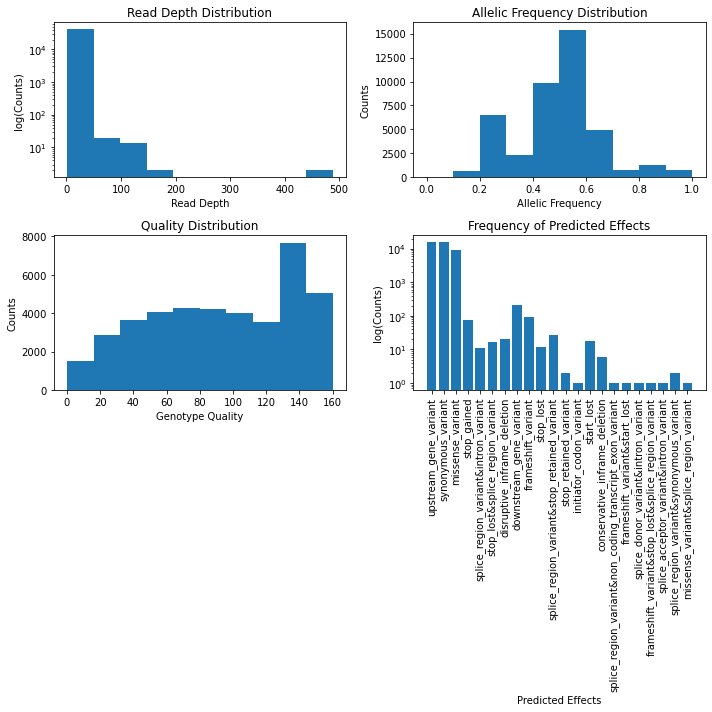

In [405]:
fig, ax = plt.subplots(2, 2, figsize = (10 , 10))
ax[0,0].hist(df_depth.iloc[:,0])
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('log(Counts)')
ax[0,0].set_xlabel('Read Depth')
ax[0,0].set_title('Read Depth Distribution')
ax[1,0].hist(df_qual.iloc[:, 0])
ax[1,0].set_ylabel('Counts')
ax[1,0].set_xlabel('Genotype Quality')
ax[1,0].set_title('Quality Distribution')
ax[0,1].hist(df_af.iloc[:, 0])
ax[0,1].set_ylabel('Counts')
ax[0,1].set_xlabel('Allelic Frequency')
ax[0,1].set_title('Allelic Frequency Distribution')
ax[1,1].bar(eff.keys(), height = eff.values())
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('log(Counts)')
ax[1,1].set_xlabel('Predicted Effects')
ax[1,1].set_xticklabels(eff.keys(), rotation = 90)
ax[1,1].set_title('Frequency of Predicted Effects')
fig.tight_layout()
plt.show()